<a href="https://www.kaggle.com/code/illuminousyellow/info7390?scriptVersionId=226970301" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-price/tesla_price.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = "/kaggle/input/tesla-price/tesla_price.csv"
tsla_data = pd.read_csv(file_path)
print(file_path)

/kaggle/input/tesla-price/tesla_price.csv


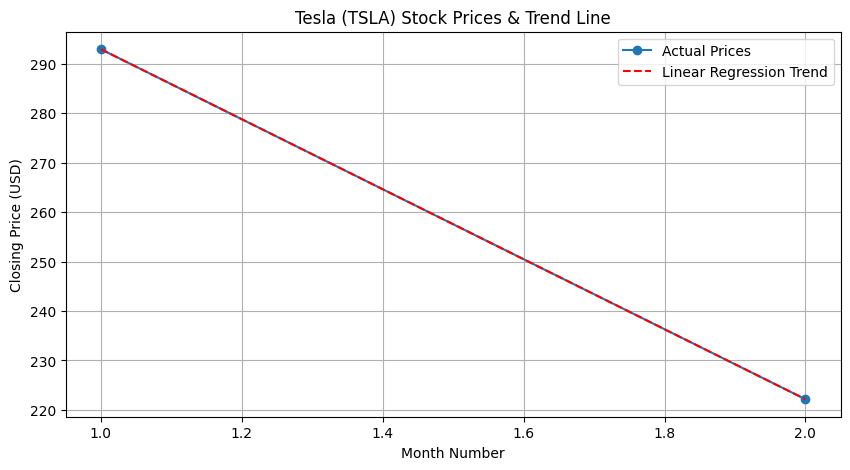

Slope of the regression line: -70.82999999999998


In [3]:
# Reverse the order to chronological sequence
tsla_data = tsla_data.iloc[::-1]

# Convert the Date column into a numerical index (assuming MM/YYYY format)
tsla_data['Month_Num'] = range(1, len(tsla_data) + 1)

# Convert Volume column to numeric (removing commas)
tsla_data['Volume'] = tsla_data['Volume'].str.replace(',', '').astype(float)

# Prepare data for Linear Regression
X = tsla_data[['Month_Num']].values  # Month numbers as independent variable
y = tsla_data['Close'].values        # Closing prices as dependent variable

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
trend_line = lin_reg.predict(X)

# Plot stock prices and trend line
plt.figure(figsize=(10, 5))
plt.plot(tsla_data['Month_Num'], y, label="Actual Prices", marker='o', linestyle='-')
plt.plot(tsla_data['Month_Num'], trend_line, label="Linear Regression Trend", linestyle='dashed', color='red')
plt.xlabel("Month Number")
plt.ylabel("Closing Price (USD)")
plt.title("Tesla (TSLA) Stock Prices & Trend Line")
plt.legend()
plt.grid()
plt.show()

# Slope of the regression line
slope = lin_reg.coef_[0]
print(f"Slope of the regression line: {slope}")
